importing



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

load and read the dataset

In [ ]:
df=pd.read_csv('/content/food_order.csv')

In [ ]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


load columns

In [ ]:
import itertools
weekday_days = itertools.cycle(['Sunday', 'Monday', 'Tuesday', 'Wednesday'])
weekend_days = itertools.cycle(['Friday', 'Saturday', 'Thursday'])

# Function to assign days
def assign_day(day_type):
    if day_type == 'Weekend':
        return next(weekend_days)
    else:
        return next(weekday_days)

# Apply the function to assign days
df['assigned_day'] = df['day_of_the_week'].apply(assign_day)


In [ ]:
weekend_locations = itertools.cycle(['Downtown', 'Business District'])

def assign_location(day):
    if day == 'Weekend':
        return next(weekend_locations)
    else:
        return 'City Center' if day == 'Weekday' else 'Residential Area'

df['location'] = df['day_of_the_week'].apply(assign_location)

In [ ]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time', 'assigned_day', 'location'],
      dtype='object')

In [ ]:
df.sample(30)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,assigned_day,location
27,1476844,175290,Otto Enoteca Pizzeria,Italian,14.02,Weekend,Not given,24,16,Friday,Business District
986,1476552,334758,Melt Shop,American,12.56,Weekend,4,25,23,Saturday,Downtown
178,1476606,350085,The Meatball Shop,Italian,17.03,Weekday,Not given,22,29,Monday,City Center
627,1478421,59673,Dig Inn Seasonal Market,American,15.71,Weekday,5,27,26,Tuesday,City Center
1852,1476644,142461,Shake Shack,American,16.93,Weekend,5,35,28,Thursday,Business District
1248,1478240,44367,Rubirosa,Italian,24.20,Weekend,4,34,16,Thursday,Downtown
594,1477851,66373,Blue Ribbon Sushi Izakaya,Japanese,32.93,Weekend,4,21,19,Saturday,Downtown
505,1477130,365469,Wo Hop Restaurant,Chinese,14.16,Weekend,4,22,16,Thursday,Downtown
786,1477244,47386,Bubby's,American,12.18,Weekday,4,28,31,Sunday,City Center
279,1476947,46859,The Meatball Shop,Italian,8.54,Weekday,5,24,29,Tuesday,City Center


In [ ]:
df.dtypes

,0
order_id,int64
customer_id,int64
restaurant_name,object
cuisine_type,object
cost_of_the_order,float64
day_of_the_week,object
rating,object
food_preparation_time,int64
delivery_time,int64
assigned_day,object


In [ ]:
def calculate_delivery_fee(hours):
    if hours <= 10:
        return 15
    elif hours <= 15:
        return 20
    elif hours <= 20:
        return 22
    elif hours <= 24:
        return 25
    else:
        return 29

df['delivery_fee'] = df['delivery_time'].apply(calculate_delivery_fee)

In [ ]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,assigned_day,location,delivery_fee
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,Friday,Downtown,22
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,Saturday,Business District,25
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,Sunday,City Center,29
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,Thursday,Downtown,20
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,Monday,City Center,25


In [ ]:
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0
location,0


In [ ]:
df = df.drop('order_id', axis=1)
df = df.drop('customer_id', axis=1)



In [ ]:
df.shape

(1898, 10)

In [ ]:
df.duplicated().sum()

0

In [ ]:
#correlation
num_corr = df.select_dtypes(include='number')
num_corr = num_corr.corr()
print(num_corr)

                       cost_of_the_order  food_preparation_time  \
cost_of_the_order               1.000000               0.041527   
food_preparation_time           0.041527               1.000000   
delivery_time                  -0.029949               0.011094   
delivery_fee                   -0.038652               0.011385   

                       delivery_time  delivery_fee  
cost_of_the_order          -0.029949     -0.038652  
food_preparation_time       0.011094      0.011385  
delivery_time               1.000000      0.928997  
delivery_fee                0.928997      1.000000  


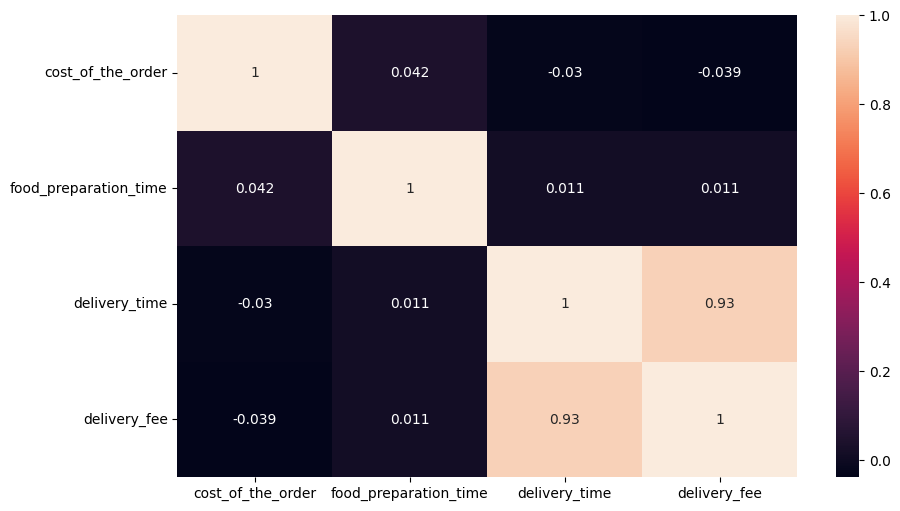

In [ ]:
#heatmap
plt.figure(figsize=(10,6))
sns.heatmap(num_corr, annot = True)
plt.show()

VISUALIZAION AND ANALYSIZ

In [ ]:
df.columns

Index(['restaurant_name', 'cuisine_type', 'cost_of_the_order',
       'day_of_the_week', 'food_preparation_time', 'delivery_time',
       'assigned_day', 'location', 'delivery_fee'],
      dtype='object')

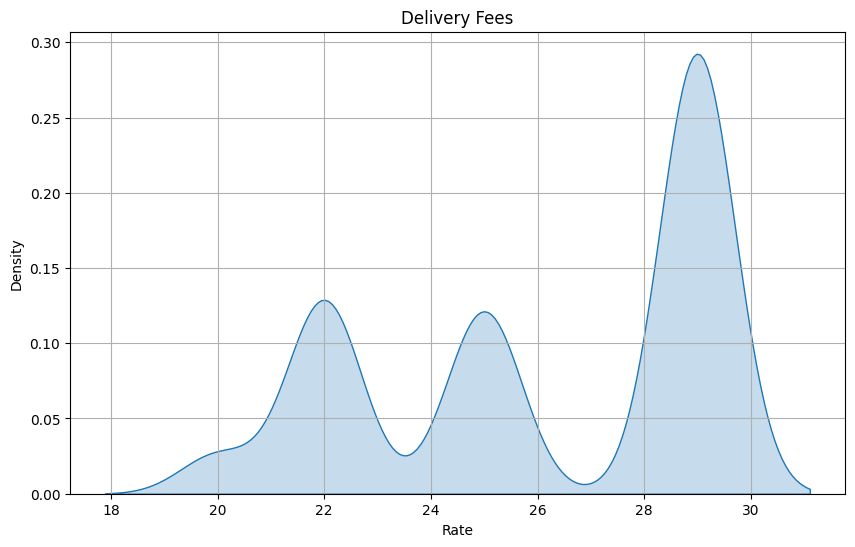

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['delivery_fee'], fill=True)
plt.title('Delivery Fees')
plt.xlabel('Rate')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [ ]:
df.dtypes

,0
restaurant_name,object
cuisine_type,object
cost_of_the_order,float64
day_of_the_week,object
rating,object
food_preparation_time,int64
delivery_time,int64
assigned_day,object
location,object
delivery_fee,int64


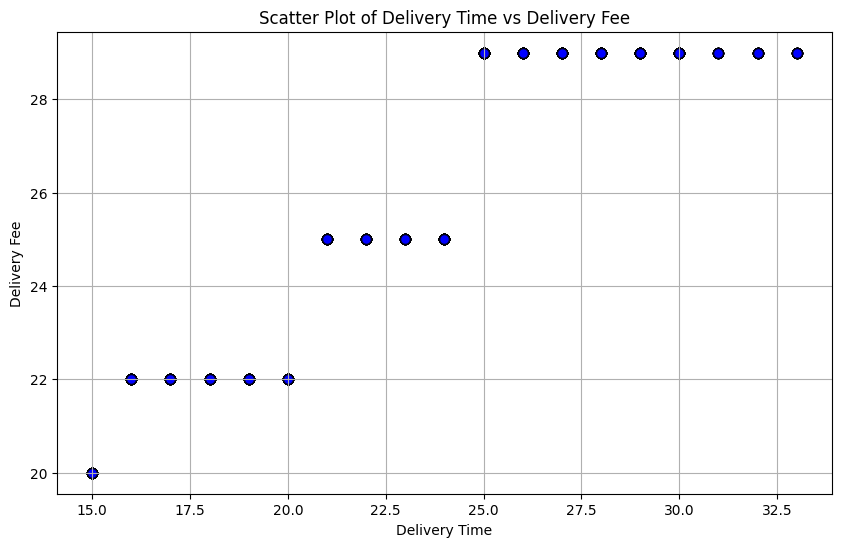

In [ ]:
x = df['delivery_time']
y = df['delivery_fee']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.7, edgecolor='k', s=50)
plt.title('Scatter Plot of {} vs {}'.format('Delivery Time', 'Delivery Fee'))
plt.xlabel('Delivery Time')
plt.ylabel('Delivery Fee')
plt.grid(True)
plt.show()


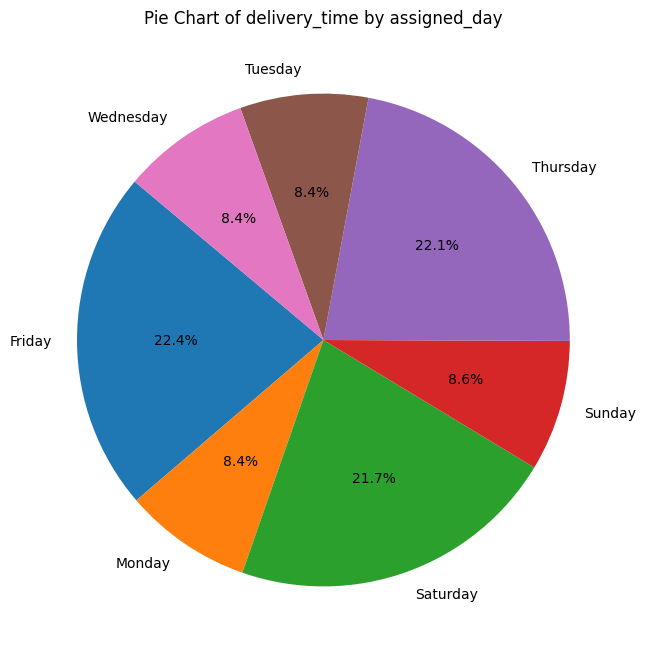

In [ ]:
numeric_column = 'delivery_time'
categorical_column = 'assigned_day'
aggregated_data = df.groupby(categorical_column)[numeric_column].sum()

plt.figure(figsize=(8, 8))
plt.pie(aggregated_data, labels=aggregated_data.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of {} by {}'.format(numeric_column, categorical_column))
plt.show()

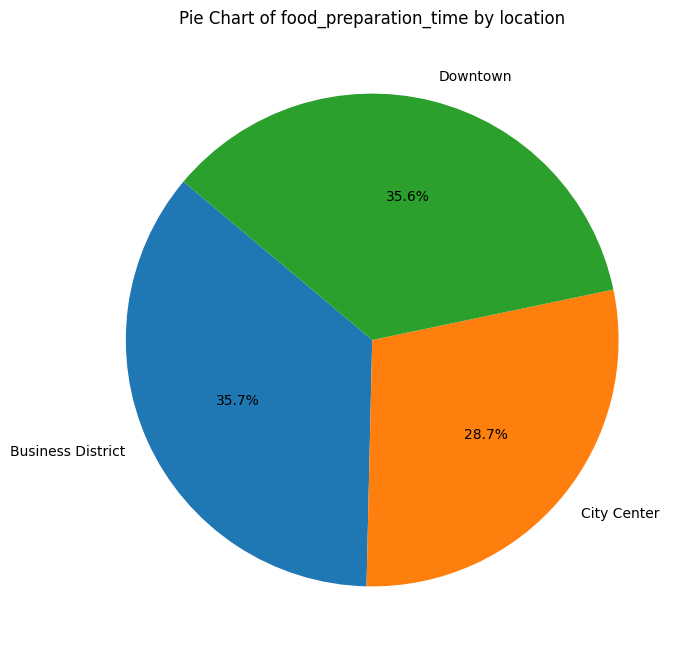

In [ ]:
numeric_column = 'food_preparation_time'
categorical_column = 'location'
aggregated_data = df.groupby(categorical_column)[numeric_column].sum()

plt.figure(figsize=(8, 8))
plt.pie(aggregated_data, labels=aggregated_data.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of {} by {}'.format(numeric_column, categorical_column))
plt.show()

In [ ]:
pip install scipy matplotlib pandas


In [ ]:
import scipy.cluster.hierarchy as sch


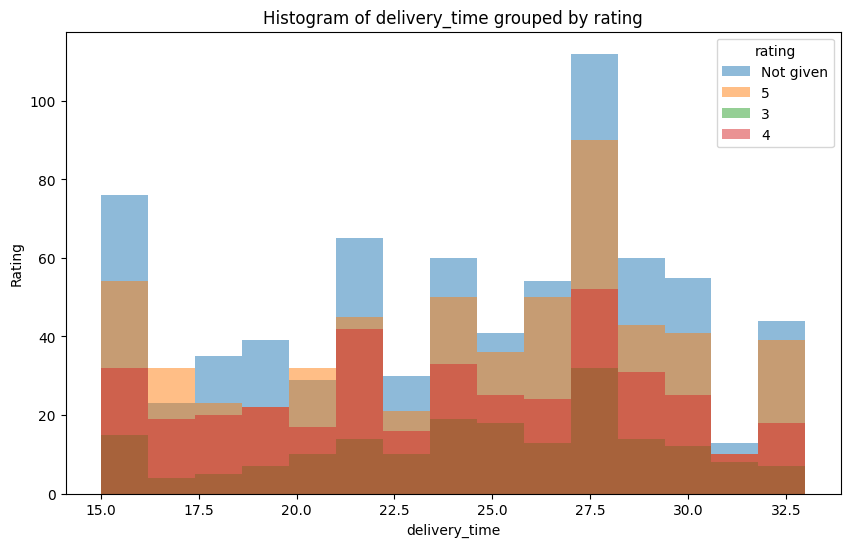

In [ ]:
categorical_column = 'rating'
numeric_column = 'delivery_time'

# Plot histograms for each category
categories = df[categorical_column].unique()

plt.figure(figsize=(10, 6))

for category in categories:
    subset = df[df[categorical_column] == category]
    plt.hist(subset[numeric_column], alpha=0.5, label=str(category), bins=15)

plt.title('Histogram of {} grouped by {}'.format(numeric_column, categorical_column))
plt.xlabel(numeric_column)
plt.ylabel('Rating')
plt.legend(title=categorical_column)
plt.show()